In [ ]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [ ]:
data = {
    'CustomerID' : list(range(1,21)),
    'Gender' : ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Age' : [19,21,20,23,31,22,35,23,64,30,67,35,58,24,37,22,35,30,52,35],
    'Annual Income' : [15,15,16,16,17,17,18,18,19,19,19,19,20,20,20,20,21,21,23,23],
    'Spending score' : [39,81,6,77,40,76,6,94,3,72,14,99,15,77,13,79,35,66,29,98]
}

In [ ]:
df = pd.DataFrame(data)

In [ ]:
X = df[['Annual Income', 'Spending score']]

In [ ]:
#elbow method
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

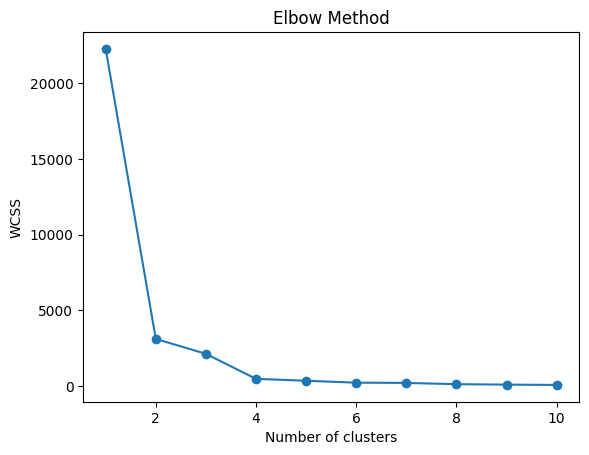

In [ ]:
plt.plot(range(1,11), wcss, marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
#apply kmeans
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

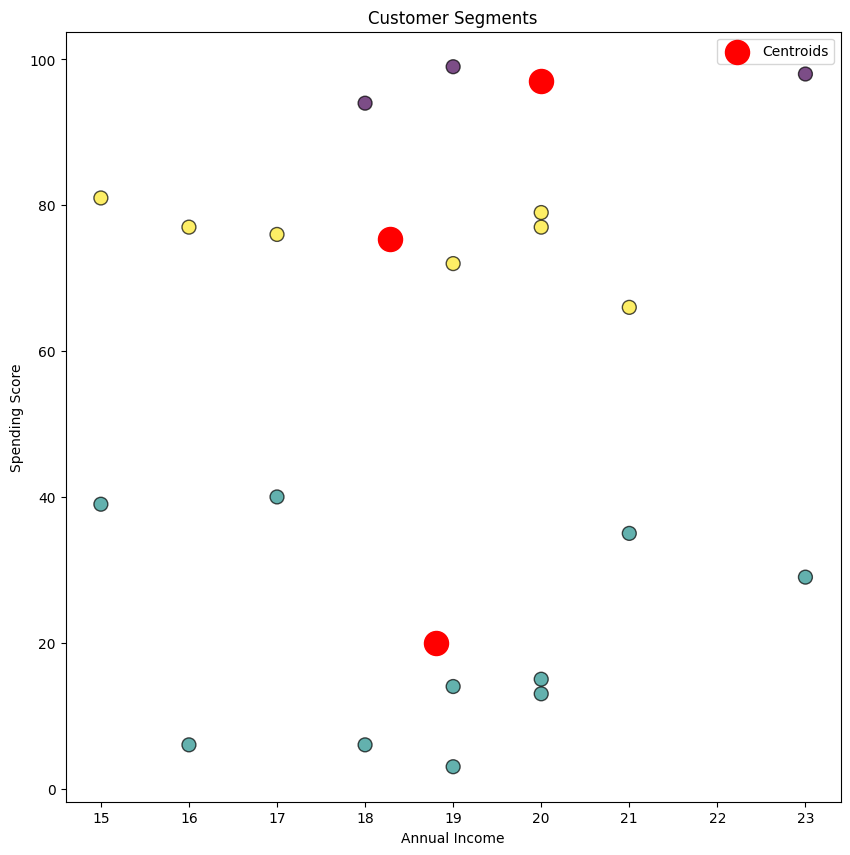

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(X['Annual Income'], X['Spending score'], c=df['Cluster'], cmap='viridis', s=100, alpha = 0.7, edgecolors = 'k')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=300, c='red', label='Centroids')
plt.title('Customer Segments')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [ ]:
print(df[['CustomerID', 'Annual Income', 'Spending score', 'Cluster']])

    CustomerID  Annual Income  Spending score  Cluster
0            1             15              39        1
1            2             15              81        2
2            3             16               6        1
3            4             16              77        2
4            5             17              40        1
5            6             17              76        2
6            7             18               6        1
7            8             18              94        0
8            9             19               3        1
9           10             19              72        2
10          11             19              14        1
11          12             19              99        0
12          13             20              15        1
13          14             20              77        2
14          15             20              13        1
15          16             20              79        2
16          17             21              35        1
17        